<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/gibbs/2variables_discretas.ipynb">  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo Muestreo de Gibbs con 2 Variables Discretas

In [7]:
dom1 = c("x1","!x1")
dom2 = c("x2","!x2")

px1_x2 = matrix(c(0.0, 1.0, 0.947, 0.053), ncol=2, dimnames = list(X1=dom1, X2=dom2))
px2_x1 = matrix(c(0.0, 1.0, 0.5, 0.5), ncol=2, dimnames = list(X2=dom2, X1=dom1))


In [8]:
px1_x2

,x2,!x2
x1,0,0.947
!x1,1,0.053


In [9]:
px2_x1

,x1,!x1
x2,0,0.5
!x2,1,0.5


In [10]:
gibbs_2discrete = function(x0, n_points, px1_x2, px2_x1) {
  x = matrix(x0, nrow=n_points, ncol=2, byrow=TRUE)
  for (t in 2:n_points) {
    x[t,1] = sample(x = dom1, 1, replace = T, prob = px1_x2[,x[t-1,2]])
    x[t,2] = sample(x = dom2, 1, replace = T, prob = px2_x1[,x[t,1]])
  }
  return(x)
}

x = gibbs_2discrete(c("!x1","!x2"), 5000, px1_x2, px2_x1)

In [11]:
prop.table(table(x[,1],x[,2]))


     
         !x2     x2
  !x1 0.0500 0.0488
  x1  0.9012 0.0000

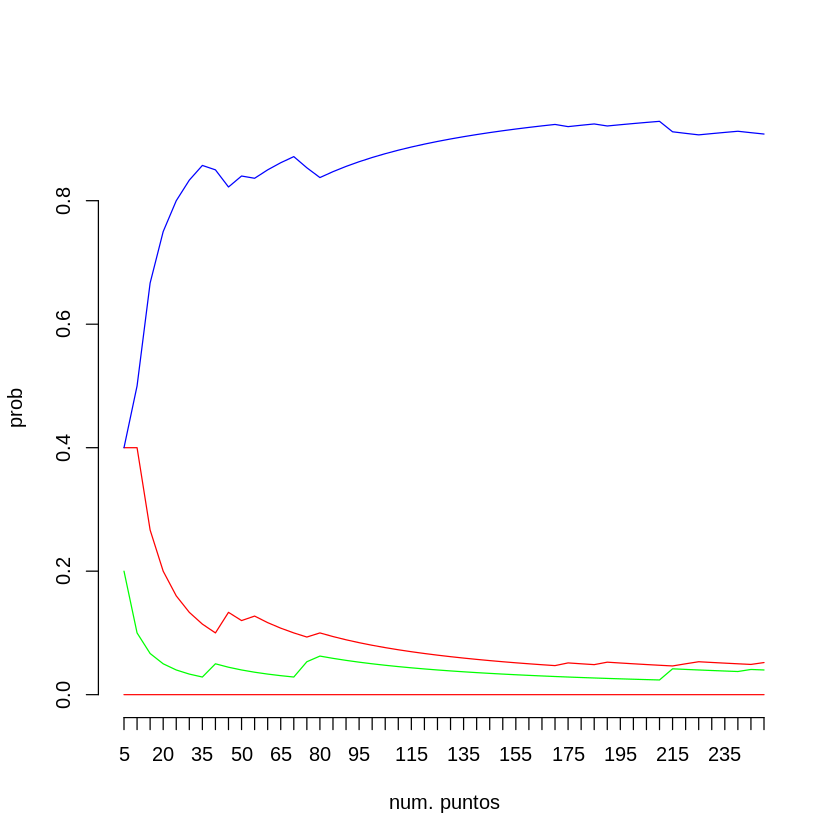

In [12]:

n = 50
n_values = seq(5,250,5)

i = 1
prob_values = matrix(nrow=length(n_values), ncol=4, byrow=T)
for(i in 1:length(n_values)) {
  n = n_values[i]
  p = prop.table(table(x[1:n,1],x[1:n,2]))
  prob_values[i,] = c(p) # !x1,!x2.  x1,!x2.  !x1,x2.  x1,x2.
}

matplot(prob_values, type = "l", lty = 1,
        col = c("red", "blue", "green"), xlab = "num. puntos",
        ylab = "prob", axes = F)


axis(2)
axis(side=1,at=1:length(n_values),labels=n_values)



